In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick</center></h2>

## Quiz Time!

## В предыдущий раз..

Мы разговаривали про линейные модели

* Рассмотрели линейную регрессию
* Рассмотрели логистическую регрессию
* Метод градиентного спуска для поиска коэффициентов моделей
* Изучили регуляризацию в линейных моделях

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png' width=400></center>

# Про геометрию линейных моделей

Уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = w_0 + \langle w, x \rangle = w_0 +  w^\top x $$

* Если $g(x^*) > 0$, то $y^* = \text{'черный'} = +1$
* Если $g(x^*) < 0$, то $y^* = \text{'белый'} = -1$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

Некоторые геометрические особенности
* $\frac{|g(x)|}{||w||}$ - расстояние от точки $x$ до гиперплоскости, степень "уверенности" в классификациий
* Величину $M = y(\langle w, x \rangle + w_0) = y \cdot g(x)$ называют **отступом**(margin)

Если для какого-то объекта $M \geq 0$, то его классификация выполнена успешно.

$$L(w) = \sum_i [y^{(i)} (\langle w, x^{(i)} \rangle + w_0) < 0] \rightarrow \min_{w, w_0}$$
<center><img src='http://jaquesgrobler.github.io/Online-Scikit-Learn-stat-tut/_images/plot_sgd_loss_functions_11.png' width=600></center>

###  Линейноразделимый случай с двумя классами
* Заметим что $g(x) = w_0 + \langle w, x \rangle$ и $g'(x) = c \cdot (w_0 + \langle w, x \rangle)$, $\forall c>0$ задают одну и ту же гиперплоскость
* Подберем $c$ таким образом, чтобы $\min\limits_i M_i = \min\limits_i y \cdot g(x_i) = 1$
<center><img src='./images/margin.png'></center>
* Таким образом выполняются следующие неравенства:
    * $w_0 + \langle w, x_i \rangle \geq 1$, если $y_i = + 1$
    * $w_0 + \langle w, x_i \rangle \leq - 1$, если $y_i = - 1$

* Разделяющая полоса:  $ -1 \leq w_0 + \langle w, x \rangle \leq +1$
* Ширина разделяющей полосы:
 $$\langle (x_{+} -  x_{-}) , \frac{w}{||w||}\rangle = \frac{\langle w, x_{+} \rangle - \langle w, x_{-} \rangle }{||w||} = \frac{2}{||w||}  \rightarrow \max$$
 
 
* Таким образом мы придем к оптимизационной задаче:
$$
\begin{cases} 
   \frac{1}{2} ||w||^2  \rightarrow \min  \\
   y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1 \quad i=1\dots n
\end{cases}
$$

По теореме Куна-Таккера:


\begin{cases} 
   \mathcal{L}(w,w_0,\lambda) = \frac{1}{2} ||w||^2  - \sum\limits_i \lambda_i \left( y^{(i)}(\langle w, x \rangle + w_0 )  - 1\right)  \rightarrow \min\limits_{w,w_0}\max\limits_{\lambda}  \\
   \lambda_i \geq 0 \quad i=1\dots n\\
   \lambda_i = 0 \text{, либо }  \langle w, x^{(i)} \rangle + w_0 = y^{(i)} \quad i=1\dots n
\end{cases}
Объекты, для которых  $\lambda_i \neq 0$ называются ** опорными ** 


Необходимое условие:
*  $\frac{\partial \mathcal{L} }{\partial w} = w - \sum\limits_i \lambda_iy_ix_i = 0 \quad \Rightarrow  \quad w = \sum\limits_i \lambda_iy_ix_i$
*  $\frac{\partial \mathcal{L} }{\partial w_0} = \sum\limits_i \lambda_iy_i = 0$

Если подставить  эти результаты в $\mathcal{L}$ то получится
\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle x_i, x_j \rangle)  \rightarrow \max\limits_\lambda  \\
\lambda_i \geq 0 \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}

* **Зависит не от самих объектов, а от их скалярного произведения! **
* $\mathcal{L}(\lambda)$ - выпуклая и ограниченная сверху функция.
* Имеем единственное решение при линейной разделимости
* Находим $\lambda_i,$ из $w = \sum\limits_i \lambda_iy_ix_i$ находим коэффициенты $w$.
* Свободный член $w_0$ определяется как среднее или медиана $\{\langle w, x_i \rangle - y_i: \lambda_i \neq 0\}$

In [2]:
from sklearn.datasets.samples_generator import make_classification

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def plot_svc_log_decision_function(clf1, clf2, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    P2 = clf2.decision_function(XY)
    P2 = P2.reshape(XX.shape)
    # plot the margins
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    
    ax.contour(XX, YY, P2, colors='r', label='logreg',
               levels=[0], alpha=0.5,
               linestyles=['-'])

    
def plot_svc_decision_function(clf1, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    # plot the margins
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    

def lin_sep_svm_demo(class_sep=2):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel='linear', C=100).fit(X, y)
    
    log_reg = LogisticRegression(C=100).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_log_decision_function(lin_svm, log_reg)
    plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

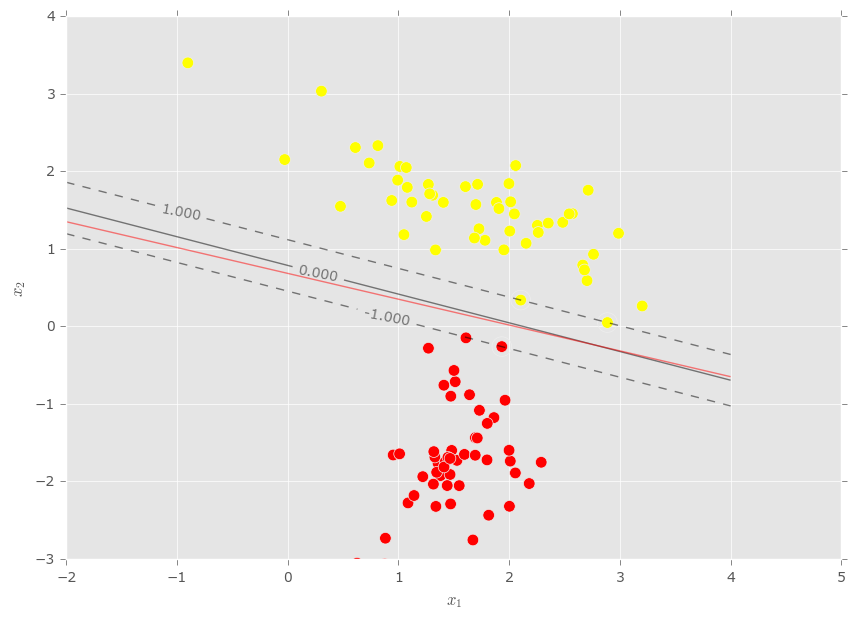

In [3]:
interact(lin_sep_svm_demo, class_sep=FloatSlider(min=0.4, max=4, step=0.1, value=2))

### Неразделимый случай 

Будем допускать пропуск объектов за разделительную линию
* Вместо условия $y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1$
* Будет условие $y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1 - \xi_i, \quad \xi_i \geq 0$

<center><img src='./images/slack.png'></center>

А целевой функционал заменим на 

$$ \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi}  $$

Таким образом мы придем к оптимизационной задаче:
$$
\begin{cases} 
   \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi} \\
   y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1 - \xi_i \quad i=1\dots n \\
   \xi_i \geq 0 \quad i=1\dots n
\end{cases}
$$


Условия Куна-Таккера, необходимые условия оптимума $\rightarrow$ получаем сопреженную задачу
\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle x_i, x_j \rangle)  \rightarrow \max\limits_\lambda  \\
0 \leq \lambda_i \leq C \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}

Заметим, что изначальный целевой функционал
$$ \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi}  $$
Можно представить в виде
$$ \frac{1}{2С} ||w||^2 + \sum\limits_i(1-M_i)_+ \rightarrow \min\limits_{w,w_0}, $$
где $M_i$ - это отступ объекта  $x^{(i)}$

In [4]:
def lin_sep_svm_demo_C(class_sep=2, C=10):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel='linear', C=C).fit(X, y)
    
    log_reg = LogisticRegression(C=C).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_log_decision_function(lin_svm, log_reg)
    plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

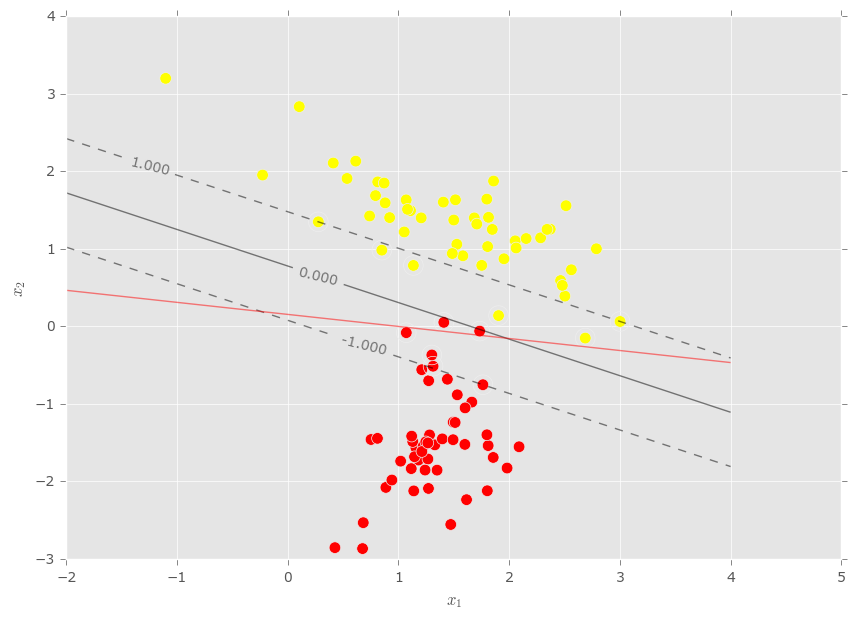

In [5]:
interact(lin_sep_svm_demo_C, class_sep=FloatSlider(min=0.2, max=4, value=2, step=0.2), C=FloatSlider(min=0.002, max=10, step=0.002, value=1))

# Ядра и спрямляющие пространства

<center><img src='images/interstellar.jpg' width='600'></center>

In [6]:
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits import mplot3d

def demo_nonlin_data():
    X, y = make_circles(n_samples=100, factor=0.1, 
                        noise=0.1, random_state=0)

    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    r = X[:, 0] ** 2 + X[:, 1] ** 2
    
    ax = fig.add_subplot(1, 2, 2)
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=70, cmap='autumn')
    ax.view_init(elev=30, azim=30)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_1^2 + x_2^2$')

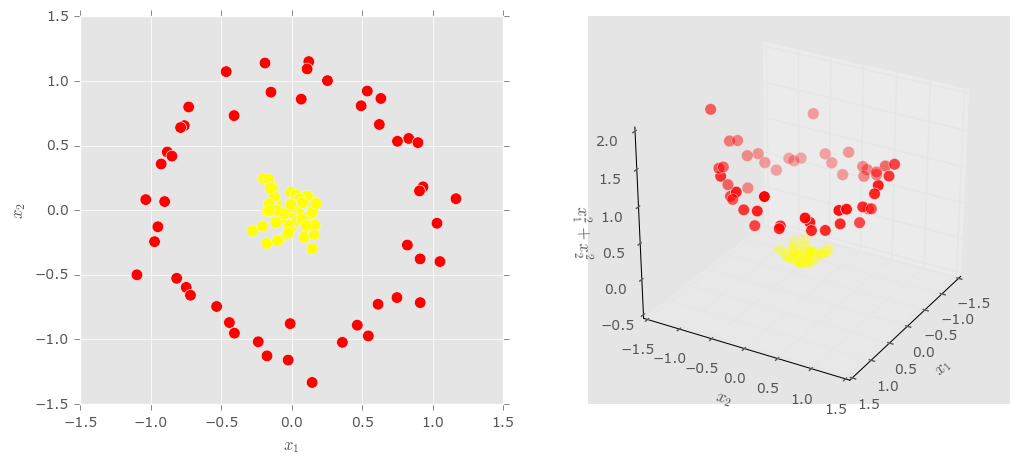

In [7]:
demo_nonlin_data() 

* $\psi: X \rightarrow H$
* $H$ - пространство большей размерности, в котором классы становятся линейноразделимыми называется **спрямляющим**.
* Разделяющся гиперплоскость в таком пространстве будет линейной, но при проекции на исходное пространство $X$ - нет

* Представим, что мы строим SVM в $H$
\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle \psi(x_i), \psi(x_j) \rangle)  \rightarrow \max\limits_\lambda  \\
0 \leq \lambda_i \leq C \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}
* Получается, нам не нужно в явном виде выражать преобразование $\psi$, нужно лишь знать результат скалярного произведения!
* Kernel trick!
* $k(x_i, x_j) = \langle \psi(x_i), \psi(x_j) \rangle$ - ядро

**Функция принятия решений:**
* Было $g(x) = w^\top x + w_0, \quad w = \sum\limits_{i:\lambda_i>0} \lambda_iy_ix_i$
* Получаем $g(x) = \sum\limits_{i:\lambda_i>0} \lambda_iy_i\langle x_i, x \rangle + w_0 = \sum\limits_{i:\lambda_i>0} \lambda_iy_i k(x_i, x) + w_0$

** Теорема Мерсера **<br/>
Функция $k(u, v)$ является ядром тогда и только тогда, когда она симметрична $k(u, v) = k(v, u)$, и неотрицательно определена, $ \int_X \int_X k(u,v) f(u)f(v) du dv \geq 0$,  $\forall f: X \rightarrow \mathbb{R}$

** Некоторые способы построения ядер **
1. Скалярное произведение - ядро, $k(u,v) = \langle u, v \rangle$
2. Константа - ядро, $k(u,v) = 1$
3. $\forall \phi: X \rightarrow \mathbb{R}$ произведение $k(u,v) =  \phi(u) \phi(v)$ - ядро
4. $k(u,v)  = \alpha_1k_1(u,v)  + \alpha_2k_2(u,v) $ - ядро
4. $k(u,v)  =  k_1(u,v) \cdot k_2(u,v) $ - ядро
5. $\forall \phi: X \rightarrow X \quad k(u,v) = k'(\phi(u),\phi(v)) $ - ядро

#### Пример ядра
* Пусть $X \in \mathbb{R}^2$
* Рассмотрим $\langle x, y \rangle^2 = (x_1y_1 + x_2y_2)^2 = x_1^2y_1^2 + x_2^2y_2^2 + 2x_1y_1x_2y_2 $
* $\psi(x) = ?$
* $k(x,y) = ?$

#### Связь ядра, нормы и расстояния
* $k(x,y)$ - ядро
* Норма $\|\psi(x)\|^2 = \langle \psi(x), \psi(x) \rangle = k(x,x)$
* Расстояние $\|\psi(x) - \psi(y)\|^2 = \langle \psi(x)-\psi(y), \psi(x)-\psi(y) \rangle = k(x,x) + k(y,y) - 2k(x,y)$

Наиболее популярны следующие ядра:

1. Линейное (linear): $$\langle x, y\rangle$$
2. Полиномиальное (polynomial): $$(\gamma \langle x, y\rangle + с)^d,$$ 
3. Radial basis function kernel (rbf): $$e^{(-\gamma  \cdot \|x - y\|^2)},$$ 
4. Sigmoid: $$\tanh(\gamma \langle x,y \rangle + r)$$ 

In [8]:
def lin_sep_svm_demo_kernel_C(class_sep=2, kernel='linear', C = 1, gamma=1.2, degree=2, coef0=0.0):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, coef0=0.0).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_decision_function(lin_svm)
    plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

In [9]:
from IPython.display import YouTubeVideo

In [10]:
YouTubeVideo('3liCbRZPrZA', width=640, height=480)

<function __main__.lin_sep_svm_demo_kernel_C>

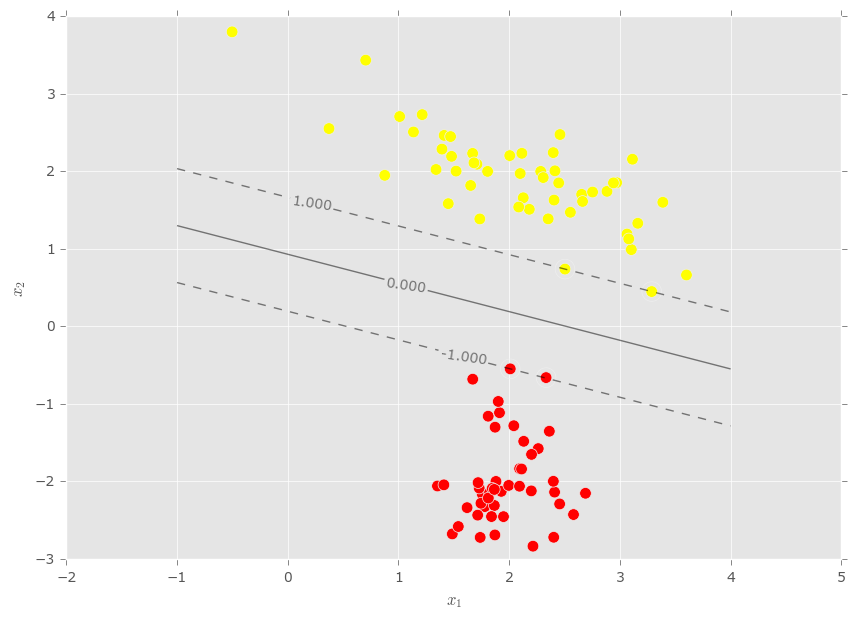

In [11]:
interact(lin_sep_svm_demo_kernel_C, class_sep=FloatSlider(min=0.2, max=4, value=2, step=0.2), kernel=['rbf', 'linear', 'poly'],         coef0=FloatSlider(min=0, max=10, step=0.2, value=0),         C=FloatSlider(min=0.002, max=10, step=0.002, value=1),         degree=FloatSlider(min=2, max=3, step=1, value=2),         gamma=FloatSlider(min=0.01, max=5, step=0.01, value=0.5),)

# SVM для регрессии


<center><img src='images/regression.png' width=500></center>

# SVM для регрессии

Переменные $\xi_i \geq 0$, $\hat \xi_i \geq 0$ (slacks):
$$
y_i \leq g(x_i) + \epsilon + \xi_i
$$
$$
y_i \geq g(x_i) - \epsilon - \hat \xi_i
$$
Задача оптимизации

$$
\begin{cases} 
   C \sum_{i=1}^n (\hat \xi_i + \xi_i) + \frac{1}{2}\|w\|^2 \rightarrow \min\limits_{w, w_0} \\
   g(x_i) - y_i \leq \epsilon + \xi_i \\
   y_i - g(x_i) \leq \epsilon + \hat{\xi}_i 
\end{cases}
$$


## Вопросы?

## Оставьте, пожалуйста, свой отзыв